# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\miran\Downloads/'

[i] The following files were found:
	crime_files[0] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present (1).csv'
	crime_files[1] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present (2).csv'
	crime_files[2] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present (3).csv'
	crime_files[3] = 'C:\Users\miran\Downloads\Crimes_-_2001_to_Present.csv'

- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.


In [9]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = (r"C:/Users/miran/Downloads/Crimes_-_2001_to_Present.csv") #(or slice correct index from the crime_files list)

if RAW_FILE == (r"C:\Users\miran\Downloads\Crimes_-_2001_to_Present.csv"):
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'C:/Users/miran/Downloads/Crimes_-_2001_to_Present.csv'

In [10]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [11]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [12]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,13131978,JG330778,07/06/2023 11:58:00 PM,077XX N ASHLAND AVE,1025,ARSON,AGGRAVATED,APARTMENT,False,True,2422,24.00,49.00,1.00,09,"1,164,297.00","1,951,246.00",2023,07/13/2023 04:47:35 PM,42.02,-87.67,"(42.021841312, -87.670714739)",3.00,"21,853.00",10.00,340.00,5.00,9.00,11.00,32.00
1,13131981,JG330809,07/06/2023 11:58:00 PM,077XX N ASHLAND AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,2422,24.00,49.00,1.00,26,"1,164,297.00","1,951,246.00",2023,07/13/2023 04:47:35 PM,42.02,-87.67,"(42.021841312, -87.670714739)",3.00,"21,853.00",10.00,340.00,5.00,9.00,11.00,32.00
2,13131953,JG330783,07/06/2023 11:57:00 PM,039XX W 103RD ST,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,2211,22.00,19.00,74.00,06,"1,151,669.00","1,836,013.00",2023,07/13/2023 04:47:35 PM,41.71,-87.72,"(41.705887536, -87.720214826)",33.00,"4,447.00",73.00,316.00,42.00,33.00,9.00,254.00
3,13131923,JG330794,07/06/2023 11:53:00 PM,023XX N MAJOR AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,2515,25.00,36.00,19.00,17,"1,137,996.00","1,915,011.00",2023,07/13/2023 04:47:35 PM,41.92,-87.77,"(41.92292724, -87.768383501)",4.00,"22,615.00",19.00,57.00,44.00,2.00,6.00,133.00
4,13131898,JG330762,07/06/2023 11:45:00 PM,069XX S ABERDEEN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,733,7.00,16.00,68.00,08B,"1,170,180.00","1,858,806.00",2023,07/13/2023 04:47:35 PM,41.77,-87.65,"(41.768053069, -87.651767597)",17.00,"21,559.00",66.00,410.00,32.00,11.00,17.00,215.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840553,9755231,HX403556,01/01/2001 12:00:00 AM,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,29.00,17,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7840554,9755238,HX403557,01/01/2001 12:00:00 AM,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,29.00,17,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7840555,9863118,HX512727,01/01/2001 12:00:00 AM,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,29.00,17,NaN,NaN,2001,08/31/2015 03:43:09 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7840556,10870889,JA178260,01/01/2001 12:00:00 AM,009XX E 84TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,632,6.00,8.00,44.00,11,NaN,NaN,2001,03/11/2017 03:50:12 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'07/06/2023 11:58:00 PM'

Timestamp('2023-07-06 11:58:00')

In [14]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.00,20.00,40.00,20,"1,178,551.00","1,866,538.00",2001,04/25/2007 05:57:12 AM,41.79,-87.62,"(41.789084341, -87.620849345)",53.00,"22,260.00",7.00,403.00,4.00,60.00,24.00,268.00
2001-01-01 01:00:00,1311123,G001792,01/01/2001 01:00:00 AM,022XX W 21 ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.00,NaN,NaN,14,"1,161,720.00","1,890,066.00",2001,08/17/2015 03:03:40 PM,41.85,-87.68,"(41.854014083, -87.681908988)",8.00,"14,920.00",33.00,4.00,26.00,43.00,15.00,121.00
2001-01-01 01:00:00,1311144,G001320,01/01/2001 01:00:00 AM,063XX N LEAVITT ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,NaN,14,"1,160,455.00","1,942,042.00",2001,08/17/2015 03:03:40 PM,42.00,-87.69,"(41.99666603, -87.685109858)",42.00,"4,450.00",20.00,53.00,27.00,50.00,11.00,52.00
2001-01-01 01:00:00,1311226,G000964,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,NaN,14,"1,160,728.00","1,923,242.00",2001,08/17/2015 03:03:40 PM,41.95,-87.68,"(41.945072291, -87.684629263)",13.00,"21,538.00",46.00,646.00,18.00,39.00,5.00,21.00
2001-01-01 01:00:00,1311269,G001223,01/01/2001 01:00:00 AM,076XX S COLFAX AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,NaN,14,"1,194,808.00","1,854,873.00",2001,08/17/2015 03:03:40 PM,41.76,-87.56,"(41.756689633, -87.561625217)",43.00,"22,538.00",39.00,245.00,37.00,24.00,19.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 12:53:00,13131228,JG330008,07/06/2023 12:53:00 PM,063XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,725,7.00,16.00,67.00,08B,"1,166,757.00","1,862,719.00",2023,07/13/2023 04:47:35 PM,41.78,-87.66,"(41.778864596, -87.6642029)",19.00,"22,257.00",65.00,279.00,2.00,23.00,17.00,204.00
2023-07-06 12:55:00,13131307,JG330032,07/06/2023 12:55:00 PM,001XX W DIVISION ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,1821,18.00,2.00,8.00,18,"1,175,207.00","1,908,349.00",2023,07/13/2023 04:47:35 PM,41.90,-87.63,"(41.903892302, -87.631858359)",22.00,"14,926.00",37.00,310.00,46.00,54.00,14.00,197.00
2023-07-06 12:55:00,13131285,JG330025,07/06/2023 12:55:00 PM,057XX S KENWOOD AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,235,2.00,5.00,41.00,04A,"1,186,083.00","1,867,309.00",2023,07/13/2023 04:47:35 PM,41.79,-87.59,"(41.791025425, -87.593208033)",32.00,"22,260.00",8.00,503.00,33.00,60.00,24.00,132.00


In [15]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                           0.00
Case Number                  0.00
Date                         0.00
Block                        0.00
IUCR                         0.00
Primary Type                 0.00
Description                  0.00
Location Description         0.00
Arrest                       0.00
Domestic                     0.00
Beat                         0.00
District                     0.00
Ward                         0.08
Community Area               0.08
FBI Code                     0.00
X Coordinate                 0.01
Y Coordinate                 0.01
Year                         0.00
Updated On                   0.00
Latitude                     0.01
Longitude                    0.01
Location                     0.01
Historical Wards 2003-2015   0.01
Zip Codes                    0.01
Community Areas              0.01
Census Tracts                0.01
Wards                        0.01
Boundaries - ZIP Codes       0.01
Police Districts             0.01
Police Beats  

In [16]:
chicago_full['Year'] = chicago_full.dropna(subset=['Year'], inplace=True)

## Separate the Full Dataset by Years

In [17]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(int)
chicago_full["Year"].value_counts()

2002    486804
2001    485885
2003    475983
2004    469421
2005    453772
2006    448177
2007    437087
2008    427169
2009    392824
2010    370503
2011    351973
2012    336272
2013    307475
2014    275742
2016    269807
2017    269093
2018    268808
2015    264774
2019    261289
2022    238678
2020    212165
2021    208711
2023    128146
Name: Year, dtype: int64

In [18]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [19]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.00,20.00,2001,41.79,-87.62,53.00,"22,260.00",7.00,403.00,4.00,60.00,24.00,268.00
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.00,NaN,2001,41.85,-87.68,8.00,"14,920.00",33.00,4.00,26.00,43.00,15.00,121.00
2001-01-01 01:00:00,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,2001,42.00,-87.69,42.00,"4,450.00",20.00,53.00,27.00,50.00,11.00,52.00
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,2001,41.95,-87.68,13.00,"21,538.00",46.00,646.00,18.00,39.00,5.00,21.00
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,2001,41.76,-87.56,43.00,"22,538.00",39.00,245.00,37.00,24.00,19.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06 12:53:00,13131228,07/06/2023 12:53:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,725,7.00,16.00,2023,41.78,-87.66,19.00,"22,257.00",65.00,279.00,2.00,23.00,17.00,204.00
2023-07-06 12:55:00,13131307,07/06/2023 12:55:00 PM,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,1821,18.00,2.00,2023,41.90,-87.63,22.00,"14,926.00",37.00,310.00,46.00,54.00,14.00,197.00
2023-07-06 12:55:00,13131285,07/06/2023 12:55:00 PM,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,235,2.00,5.00,2023,41.79,-87.59,32.00,"22,260.00",8.00,503.00,33.00,60.00,24.00,132.00


In [20]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7840558 entries, 2001-01-01 01:00:00 to 2023-07-06 12:58:00
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Date                        object 
 2   Primary Type                object 
 3   Description                 object 
 4   Location Description        object 
 5   Arrest                      bool   
 6   Domestic                    bool   
 7   Beat                        int64  
 8   District                    float64
 9   Ward                        float64
 10  Year                        int32  
 11  Latitude                    float64
 12  Longitude                   float64
 13  Historical Wards 2003-2015  float64
 14  Zip Codes                   float64
 15  Community Areas             float64
 16  Census Tracts               float64
 17  Wards                       float64
 18  Boundaries - ZIP Codes      f

In [21]:
chicago_final.memory_usage(deep=True).astype(float)

Index                         62,724,464.00
ID                            62,724,464.00
Date                         619,404,082.00
Primary Type                 525,651,986.00
Description                  573,917,848.00
Location Description         534,435,247.00
Arrest                         7,840,558.00
Domestic                       7,840,558.00
Beat                          62,724,464.00
District                      62,724,464.00
Ward                          62,724,464.00
Year                          31,362,232.00
Latitude                      62,724,464.00
Longitude                     62,724,464.00
Historical Wards 2003-2015    62,724,464.00
Zip Codes                     62,724,464.00
Community Areas               62,724,464.00
Census Tracts                 62,724,464.00
Wards                         62,724,464.00
Boundaries - ZIP Codes        62,724,464.00
Police Districts              62,724,464.00
Police Beats                  62,724,464.00
dtype: float64

In [22]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [23]:
FINAL_DROP = ['Datetime','Year','Location Description']

In [24]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [25]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [26]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [27]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,True,233,2.00,20.00,41.79,-87.62,53.00,"22,260.00",7.00,403.00,4.00,60.00,24.00,268.00
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,1223,12.00,NaN,41.85,-87.68,8.00,"14,920.00",33.00,4.00,26.00,43.00,15.00,121.00
2,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,2413,24.00,NaN,42.00,-87.69,42.00,"4,450.00",20.00,53.00,27.00,50.00,11.00,52.00
3,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.00,NaN,41.95,-87.68,13.00,"21,538.00",46.00,646.00,18.00,39.00,5.00,21.00
4,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,421,4.00,NaN,41.76,-87.56,43.00,"22,538.00",39.00,245.00,37.00,24.00,19.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128141,13131228,07/06/2023 12:53:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,725,7.00,16.00,41.78,-87.66,19.00,"22,257.00",65.00,279.00,2.00,23.00,17.00,204.00
128142,13131307,07/06/2023 12:55:00 PM,NARCOTICS,POSSESS - HEROIN (WHITE),True,False,1821,18.00,2.00,41.90,-87.63,22.00,"14,926.00",37.00,310.00,46.00,54.00,14.00,197.00
128143,13131285,07/06/2023 12:55:00 PM,ASSAULT,AGGRAVATED - HANDGUN,False,False,235,2.00,5.00,41.79,-87.59,32.00,"22,260.00",8.00,503.00,33.00,60.00,24.00,132.00
128144,13130802,07/06/2023 12:56:00 AM,CRIMINAL TRESPASS,TO LAND,True,False,2525,25.00,26.00,41.92,-87.73,27.00,"22,615.00",21.00,76.00,49.00,2.00,6.00,187.00


In [28]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485885
2002    486804
2003    475983
2004    469421
2005    453772
2006    448177
2007    437087
2008    427169
2009    392824
2010    370503
2011    351973
2012    336272
2013    307475
2014    275742
2015    264774
2016    269807
2017    269093
2018    268808
2019    261289
2020    212165
2021    208711
2022    238678
2023    128146
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

In [29]:
import holidays
import datetime as dt
from holidays import country_holidays

# 1) Comparing Police Districts:

### Which district has the most crimes? 
#### As of January 1st, 2001 to July 02, 2023 District 8 has the most crime at 526,673 reports.

### Which has the least?
#### As of January 1st, 2001 to July 02, 2023 District 21 has the least amount of crime at 4 reports.

In [30]:
crime = df.copy()
crime.head()

,ID,Date,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,True,233,2.00,20.00,41.79,-87.62,53.00,"22,260.00",7.00,403.00,4.00,60.00,24.00,268.00
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,1223,12.00,NaN,41.85,-87.68,8.00,"14,920.00",33.00,4.00,26.00,43.00,15.00,121.00
2,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,2413,24.00,NaN,42.00,-87.69,42.00,"4,450.00",20.00,53.00,27.00,50.00,11.00,52.00
3,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.00,NaN,41.95,-87.68,13.00,"21,538.00",46.00,646.00,18.00,39.00,5.00,21.00
4,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,421,4.00,NaN,41.76,-87.56,43.00,"22,538.00",39.00,245.00,37.00,24.00,19.00,225.00


In [31]:
most_crime = crime['District'].value_counts()
most_crime

8.00     526673
11.00    502946
6.00     458533
7.00     452818
25.00    445895
4.00     445135
3.00     397603
12.00    388923
9.00     382917
2.00     371398
19.00    352366
18.00    351950
5.00     347257
10.00    337843
15.00    335632
1.00     317579
14.00    303199
16.00    262588
22.00    256935
24.00    237059
17.00    226271
20.00    138742
31.00       245
21.00         4
Name: District, dtype: int64

# 2) Crimes Across the Years:
### Is the total number of crimes increasing or decreasing across the years?
#### Crime has been decreasing over the past 2 decades.
### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
#### There are criminal sexual assault reports that have not creased as much as every other year. I also see the non-criminal offenses have also increased and don't seem to be decreasing for the past decade.

In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7840558 entries, 0 to 128145
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Date                        object 
 2   Primary Type                object 
 3   Description                 object 
 4   Arrest                      bool   
 5   Domestic                    bool   
 6   Beat                        int64  
 7   District                    float64
 8   Ward                        float64
 9   Latitude                    float64
 10  Longitude                   float64
 11  Historical Wards 2003-2015  float64
 12  Zip Codes                   float64
 13  Community Areas             float64
 14  Census Tracts               float64
 15  Wards                       float64
 16  Boundaries - ZIP Codes      float64
 17  Police Districts            float64
 18  Police Beats                float64
dtypes: bool(2), float64(12

In [33]:
# CORRECT - properly recognizes dates and does not interpret them as seconds
crime['Date'] = pd.to_datetime(crime['Date'])
crime['Date']

0        2001-01-01 01:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
128141   2023-07-06 12:53:00
128142   2023-07-06 12:55:00
128143   2023-07-06 12:55:00
128144   2023-07-06 00:56:00
128145   2023-07-06 00:58:00
Name: Date, Length: 7840558, dtype: datetime64[ns]

In [34]:
## setting and sorting the index = crime.set_index("CrimeDateTime")
crime = crime.set_index("Date")
crime = crime.sort_index()
crime.head(3)

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,
2001-01-01,9754968,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,9755180,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
## saving just the date (no time) as a column
crime['Date'] = crime.index.date
crime.head(3)

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Date
Date,,,,,,,,,,,,,,,,,,,
2001-01-01,9754968,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01
2001-01-01,9755180,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01
2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01


In [36]:
## Engineering Features using components of the date/time
crime['Year']  = crime.index.year

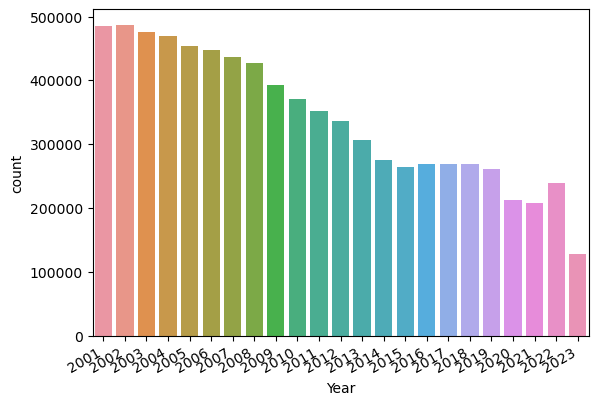

In [37]:
## Visualize years
ax = sns.countplot(data=crime, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

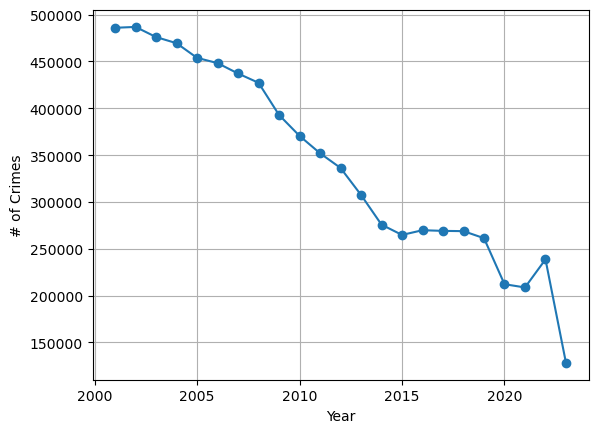

In [38]:
## save year counts
year_counts = crime['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [39]:
crime['Year'].value_counts().sort_index(ascending = False).head(15)

2023    128146
2022    238678
2021    208711
2020    212165
2019    261289
2018    268808
2017    269093
2016    269807
2015    264774
2014    275742
2013    307475
2012    336272
2011    351973
2010    370503
2009    392824
Name: Year, dtype: int64

In [40]:
## Get # of crimes by Hour
crimes_by_year = crime.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    4525
Name: Year, Length: 720, dtype: int64

In [41]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8766


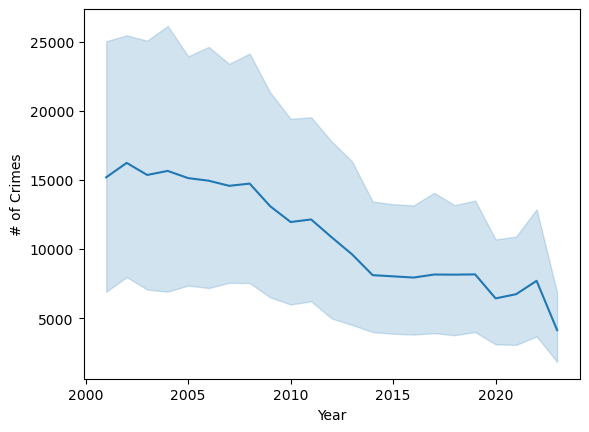

In [42]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')

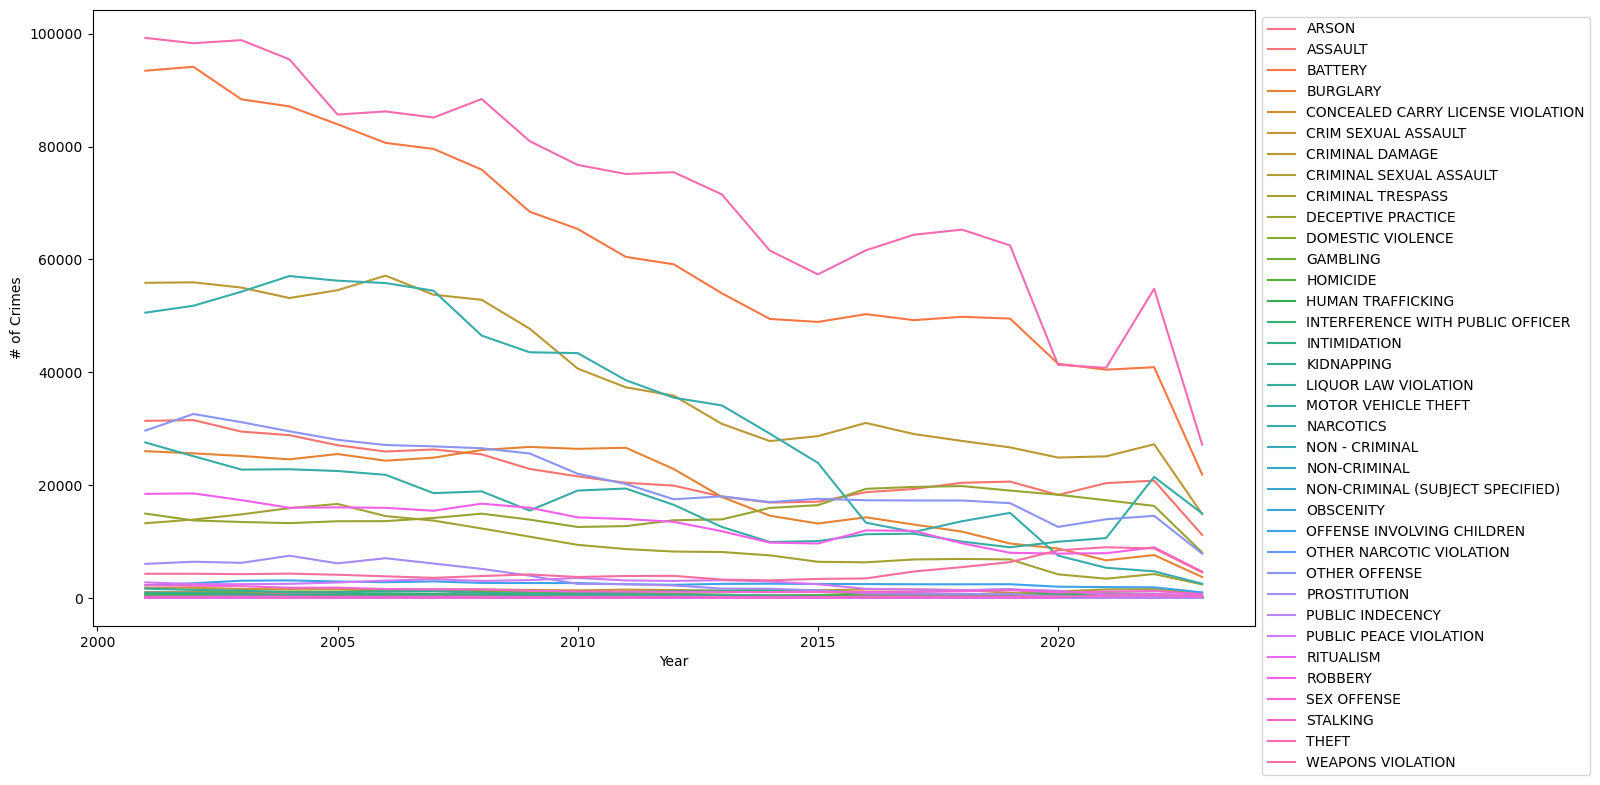

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize= (15, 8))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

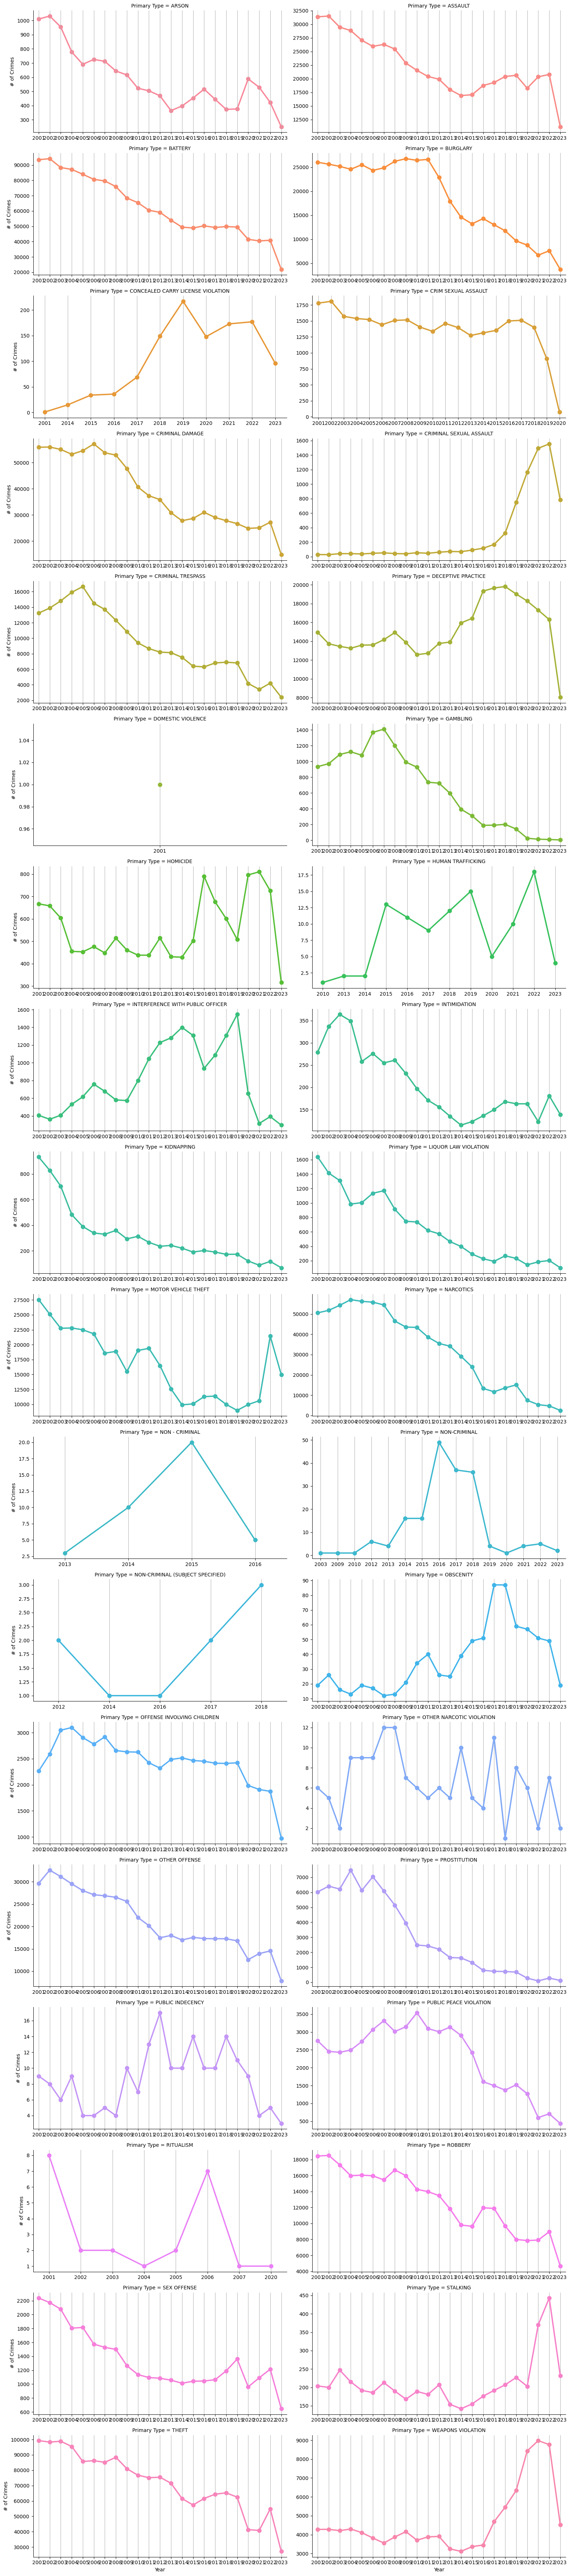

In [44]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

# 5) Comparing Holidays:
### Are there any holidays that show an increase in the # of crimes?
#### The US Holiday with the most crime is New Years and Christmas being holidays with reported more crimes in the years than most others.

### Are there any holidays that show a decrease in the # of crimes?
#### I can see that with more data I am getting better information on my graphs. Most holidays don't have an increase in crime and there are some like New Year's and Independence day where some individuals can get a bit crazy but everyday carries with it the possibility of a crime. This shows that we need to more aware of our surroundings and help each other. Looking forward to a day were nothing happens and the news just has nothing to tell us but happy stories of community and friendship. One day.

In [45]:
total_incidents= crime['Primary Type'].value_counts()
total_incidents

THEFT                                1654131
BATTERY                              1432726
CRIMINAL DAMAGE                       893756
NARCOTICS                             748657
ASSAULT                               512254
OTHER OFFENSE                         486860
BURGLARY                              425942
MOTOR VEHICLE THEFT                   381549
DECEPTIVE PRACTICE                    348738
ROBBERY                               294325
CRIMINAL TRESPASS                     215260
WEAPONS VIOLATION                     108430
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56179
PUBLIC PEACE VIOLATION                 52522
SEX OFFENSE                            30983
CRIM SEXUAL ASSAULT                    27607
INTERFERENCE WITH PUBLIC OFFICER       18500
LIQUOR LAW VIOLATION                   14948
GAMBLING                               14620
ARSON                                  13372
HOMICIDE                               12711
KIDNAPPING

In [46]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [47]:
## Saving both holiday types as columns
crime["US Holiday"] = [us_holidays.get(day) for day in crime['Date']]
crime.head()

,ID,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Date,Year,US Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9754968,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,9755180,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,9755209,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,False,False,1022,10.00,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01,2001,New Year's Day
2001-01-01,4139911,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,False,True,825,8.00,15.00,41.78,-87.69,44.00,"21,867.00",64.00,319.00,2.00,58.00,13.00,274.00,2001-01-01,2001,New Year's Day


In [48]:
## Get # of crimes by Hour
holiday_crime = crime.groupby('US Holiday')['Primary Type'].value_counts().sort_index()
holiday_crime

US Holiday             Primary Type                     
Christmas Day          ARSON                                  27
                       ASSAULT                               883
                       BATTERY                              3430
                       BURGLARY                              841
                       CONCEALED CARRY LICENSE VIOLATION       2
                                                            ... 
Washington's Birthday  ROBBERY                               581
                       SEX OFFENSE                            56
                       STALKING                                9
                       THEFT                                3697
                       WEAPONS VIOLATION                     247
Name: Primary Type, Length: 443, dtype: int64

In [50]:
## convert to dataframe and reset_index()
plot_crime = holiday_crime.to_frame('# of Crimes').reset_index()
plot_crime

,US Holiday,Primary Type,# of Crimes
0,Christmas Day,ARSON,27
1,Christmas Day,ASSAULT,883
2,Christmas Day,BATTERY,3430
3,Christmas Day,BURGLARY,841
4,Christmas Day,CONCEALED CARRY LICENSE VIOLATION,2
...,...,...,...
438,Washington's Birthday,ROBBERY,581
439,Washington's Birthday,SEX OFFENSE,56
440,Washington's Birthday,STALKING,9
441,Washington's Birthday,THEFT,3697


In [51]:
## checking the values of the index (outer index is level 0)
holiday_crime.index.levels[0]

Index(['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day',
       'Independence Day', 'Independence Day (Observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (Observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (Observed)', 'Washington's Birthday'],
      dtype='object', name='US Holiday')

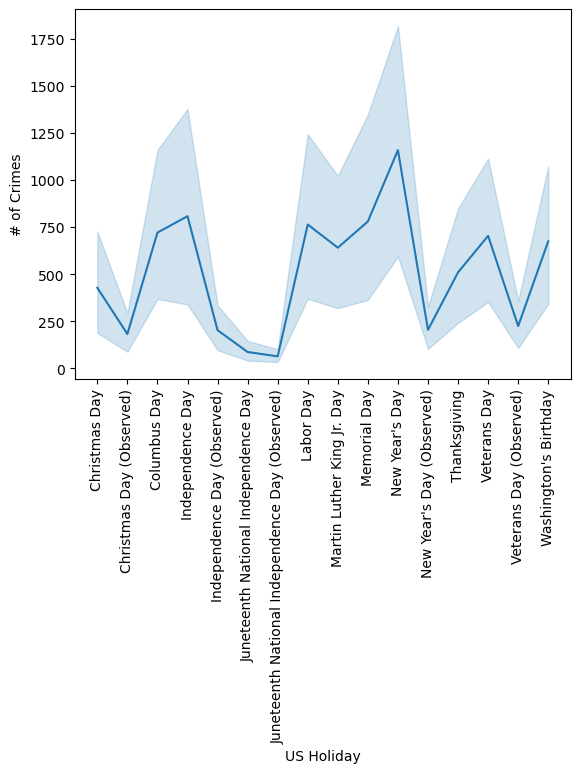

In [52]:
ax = sns.lineplot(data=plot_crime, x='US Holiday',y='# of Crimes')
plt.xticks(rotation=90);

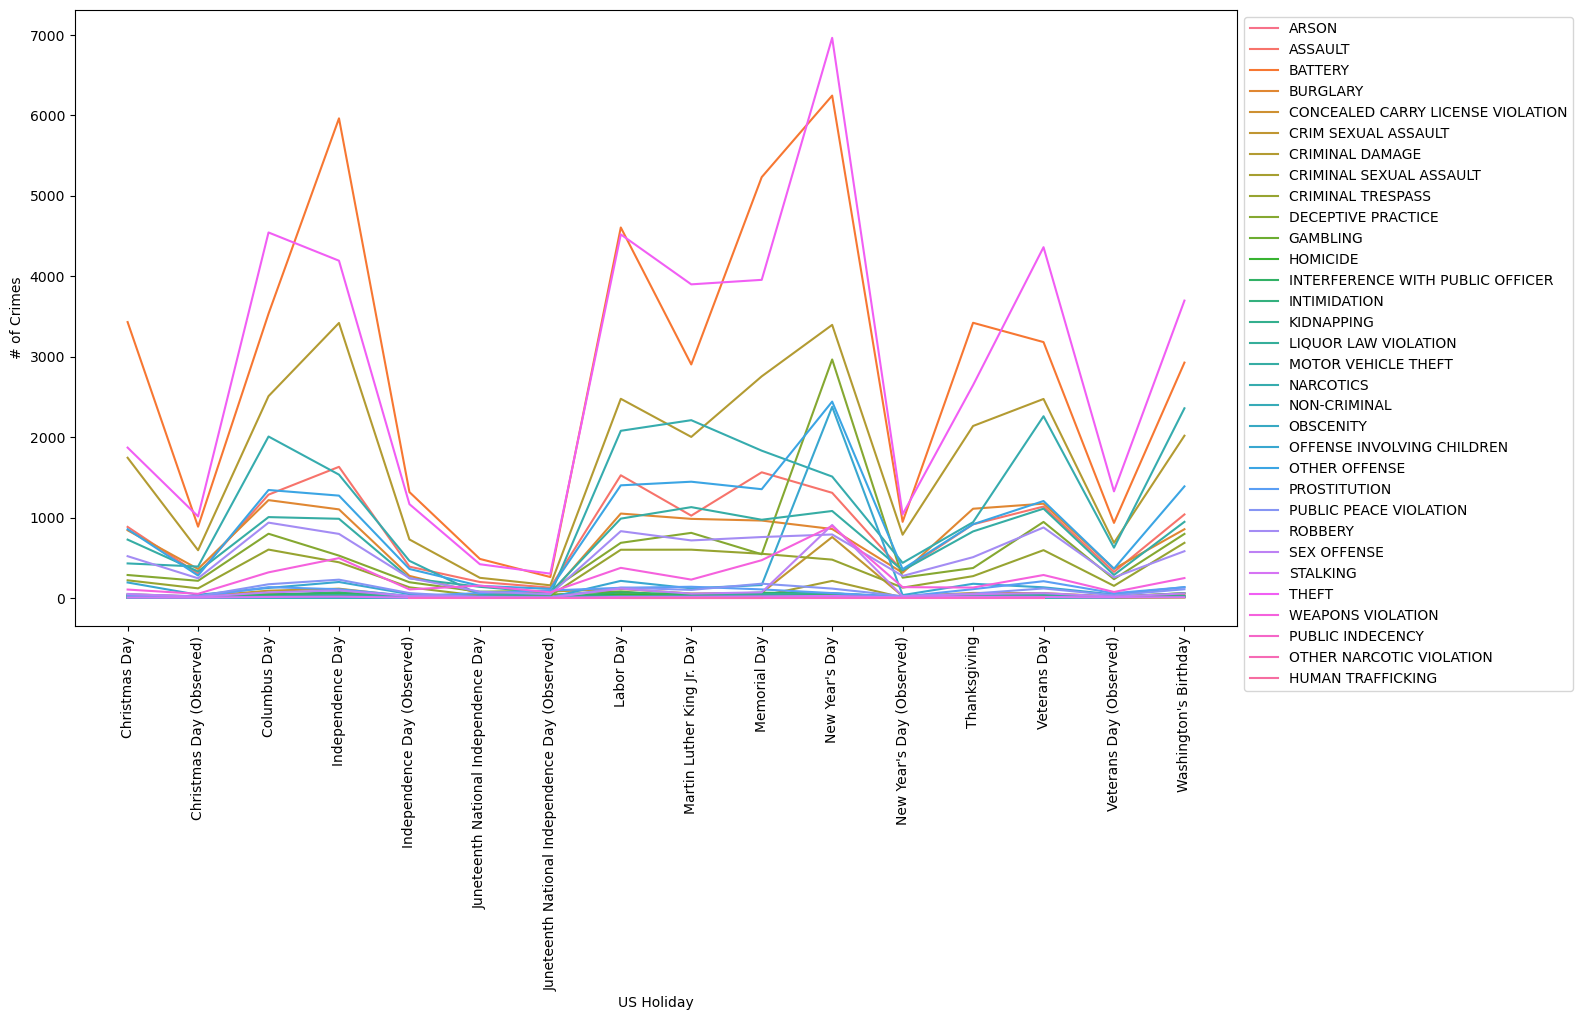

In [53]:
fig, ax = plt.subplots(figsize= (15, 8))
sns.lineplot(data= plot_crime, x='US Holiday',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);
plt.xticks(rotation=90);

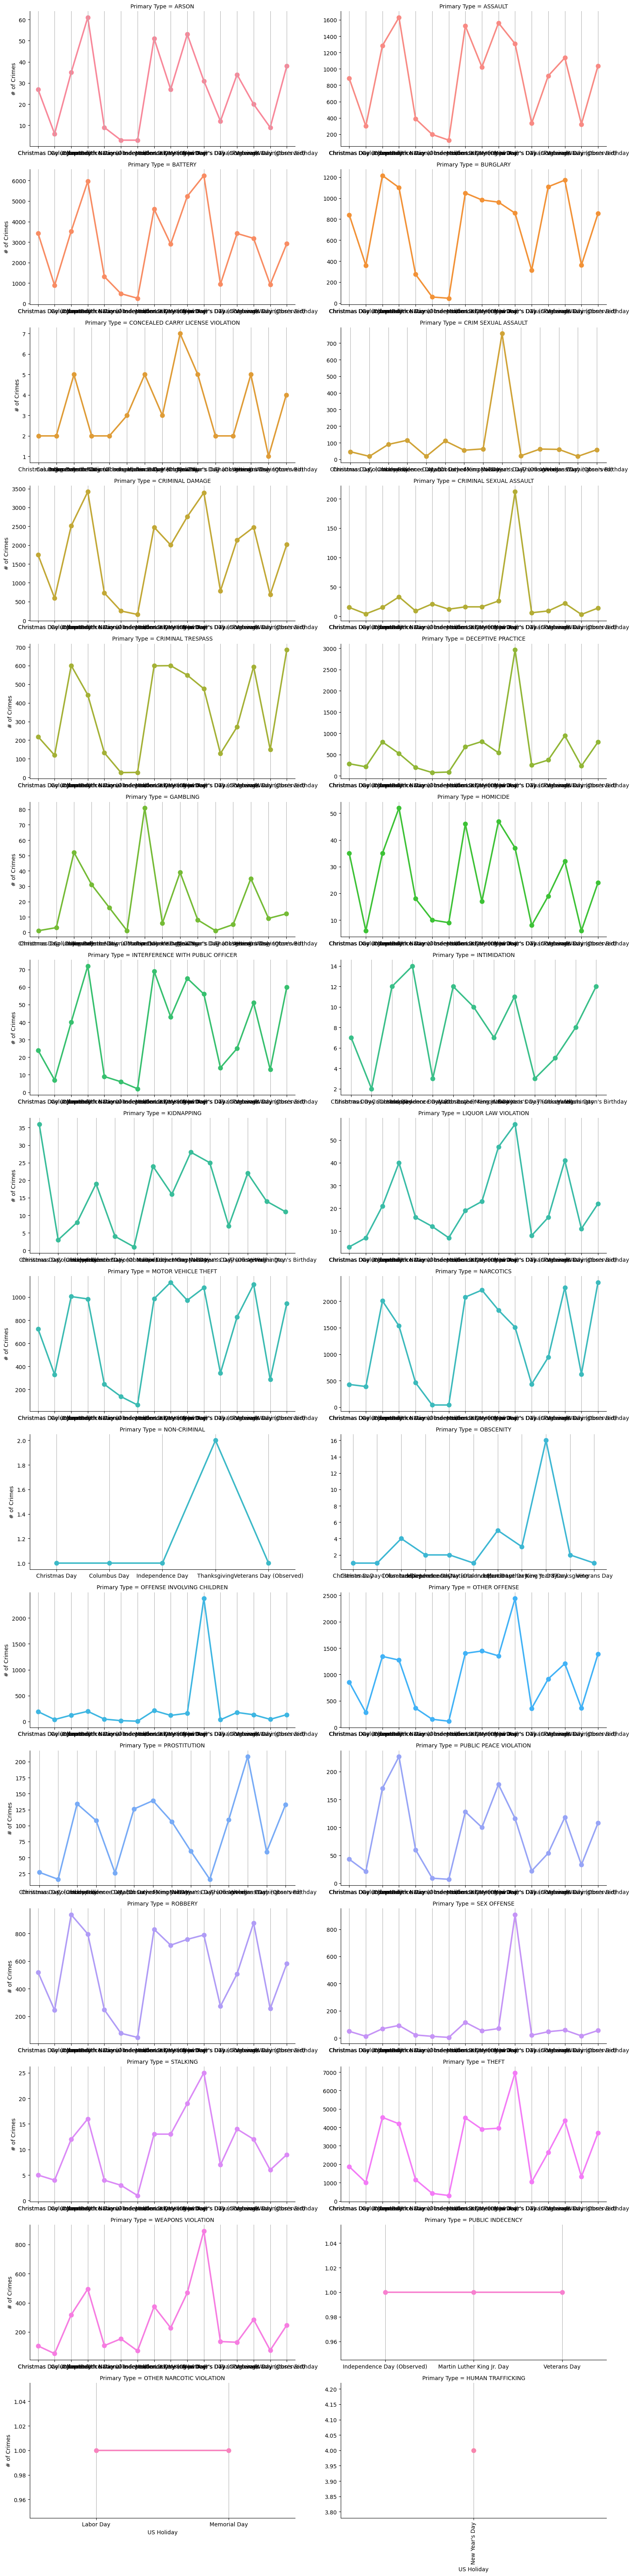

In [54]:
h = sns.catplot(data=plot_crime, x='US Holiday', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
                aspect=2, height=4,
                kind='point',sharey=False,sharex=False);

[ax.grid(axis='x') for ax in h.axes]
plt.xticks(rotation=90);

In [55]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["New Year's Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                  31
ASSAULT                              1307
BATTERY                              6246
BURGLARY                              857
CONCEALED CARRY LICENSE VIOLATION       5
CRIM SEXUAL ASSAULT                   757
CRIMINAL DAMAGE                      3395
CRIMINAL SEXUAL ASSAULT               212
CRIMINAL TRESPASS                     476
DECEPTIVE PRACTICE                   2965
GAMBLING                                8
HOMICIDE                               37
HUMAN TRAFFICKING                       4
INTERFERENCE WITH PUBLIC OFFICER       56
INTIMIDATION                           11
KIDNAPPING                             25
LIQUOR LAW VIOLATION                   57
MOTOR VEHICLE THEFT                  1081
NARCOTICS                            1509
OBSCENITY                              16
OFFENSE INVOLVING CHILDREN           2376
OTHER OFFENSE                        2441
PROSTITUTION                    

In [56]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["Christmas Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                  27
ASSAULT                               883
BATTERY                              3430
BURGLARY                              841
CONCEALED CARRY LICENSE VIOLATION       2
CRIM SEXUAL ASSAULT                    46
CRIMINAL DAMAGE                      1743
CRIMINAL SEXUAL ASSAULT                15
CRIMINAL TRESPASS                     219
DECEPTIVE PRACTICE                    285
GAMBLING                                1
HOMICIDE                               35
INTERFERENCE WITH PUBLIC OFFICER       24
INTIMIDATION                            7
KIDNAPPING                             36
LIQUOR LAW VIOLATION                    3
MOTOR VEHICLE THEFT                   725
NARCOTICS                             429
NON-CRIMINAL                            1
OBSCENITY                               1
OFFENSE INVOLVING CHILDREN            192
OTHER OFFENSE                         854
PROSTITUTION                    

In [57]:
# New Years Day
## Let's filter so we only have crimes committed on New Year's Day:
holiday_crime.loc["Independence Day"].idxmax

<bound method Series.idxmax of Primary Type
ARSON                                  61
ASSAULT                              1630
BATTERY                              5963
BURGLARY                             1101
CONCEALED CARRY LICENSE VIOLATION       5
CRIM SEXUAL ASSAULT                   115
CRIMINAL DAMAGE                      3419
CRIMINAL SEXUAL ASSAULT                33
CRIMINAL TRESPASS                     443
DECEPTIVE PRACTICE                    526
GAMBLING                               31
HOMICIDE                               52
INTERFERENCE WITH PUBLIC OFFICER       72
INTIMIDATION                           14
KIDNAPPING                             19
LIQUOR LAW VIOLATION                   40
MOTOR VEHICLE THEFT                   984
NARCOTICS                            1533
NON-CRIMINAL                            1
OBSCENITY                               2
OFFENSE INVOLVING CHILDREN            198
OTHER OFFENSE                        1272
PROSTITUTION                    

## non holiday wanted to do this part but working on my tableau core. will do redo after belt.

In [ ]:
## Saving both holiday types as columns
crime["Non US Holiday"] = [us_holidays.get(day) for day in crime['Date']]
crime.head()

In [ ]:
## Get # of crimes by Hour
holiday_crime = crime.groupby('US Holiday')['Primary Type'].value_counts().sort_index()
holiday_crime

In [ ]:
## convert to dataframe and reset_index()
plot_crime = holiday_crime.to_frame('# of Crimes').reset_index()
plot_crime